# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)

# Renomeando as colunas para melhor visualização
tab.columns = ['não_doente', 'doente', 'total']

# Calculando a proporção de doentes em cada grupo de idade (mean)
tab['mean'] = tab['doente'] / (tab['não_doente'] + tab['doente'])

# Calculando a razão de chances (odds) para cada grupo
tab['odds'] = tab['doente'] / tab['não_doente']

# Calculando o odds_ratio em relação ao total (linha 'All')
tab['odds_ratio'] = tab['odds'] / tab.loc['All', 'odds']

# Calculando o 'logito' 
tab['logito'] = np.log(tab['odds'].replace(0, np.nan))  

# Calculando 'WOE' (Weight of Evidence)
tab['WOE'] = np.log(tab['odds_ratio'].replace(0, np.nan))
tab


,não_doente,doente,total,mean,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [12]:
df['grupo_idade'] = pd.qcut(df['age'], 5, labels=['28 - 45', '45 - 53', '53 - 58', '58 - 62', '62 - 77'])

tab = pd.crosstab(df['grupo_idade'], df['flag_doente'], margins=True)

# Renomeando as colunas para melhor visualização
tab.columns = ['não_doente', 'doente', 'total']

# Calculando a proporção de doentes em cada grupo de idade (mean)
tab['mean'] = tab['doente'] / (tab['não_doente'] + tab['doente'])

# Calculando a razão de chances (odds) para cada grupo
tab['odds'] = tab['doente'] / tab['não_doente']

# Calculando o odds_ratio em relação ao total (linha 'All')
tab['odds_ratio'] = tab['odds'] / tab.loc['All', 'odds']

# Calculando o 'logito' 
tab['logito'] = np.log(tab['odds'].replace(0, np.nan))  

# Calculando 'WOE' (Weight of Evidence)
tab['WOE'] = np.log(tab['odds_ratio'].replace(0, np.nan))

# Calculando a média de 'age' para cada grupo
mean_age = df.groupby('grupo_idade', observed= False)['age'].mean().reset_index()
mean_age.columns = ['grupo_idade', 'mean_age']

# Adicionando a média de idade (age) à tabela
tab = tab.merge(mean_age, on='grupo_idade', how='left')
tab

,grupo_idade,não_doente,doente,total,mean,odds,odds_ratio,logito,WOE,mean_age
0,28 - 45,47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
1,45 - 53,42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
2,53 - 58,32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
3,58 - 62,13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
4,62 - 77,30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
5,All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

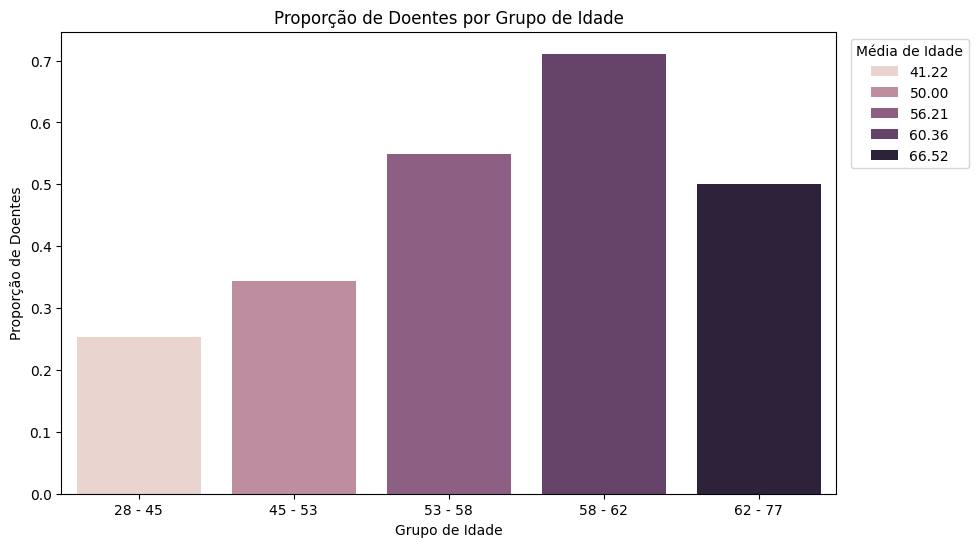

In [ ]:
# Visualizando a proporção de doentes (mean) por grupo de idade
plt.figure(figsize=(10, 6))

sns.barplot(x=tab.grupo_idade[:-1],
            y=tab['mean'][:-1], 
            hue=tab.mean_age[:-1], 
            dodge=False)

handles, labels = plt.gca().get_legend_handles_labels()
formatted_labels = [f'{i:.2f}' for i in tab.mean_age[:-1]]

plt.title('Proporção de Doentes por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Proporção de Doentes')
plt.legend(handles, formatted_labels, title='Média de Idade', loc='upper right', bbox_to_anchor=(1.18, 1))
plt.show()

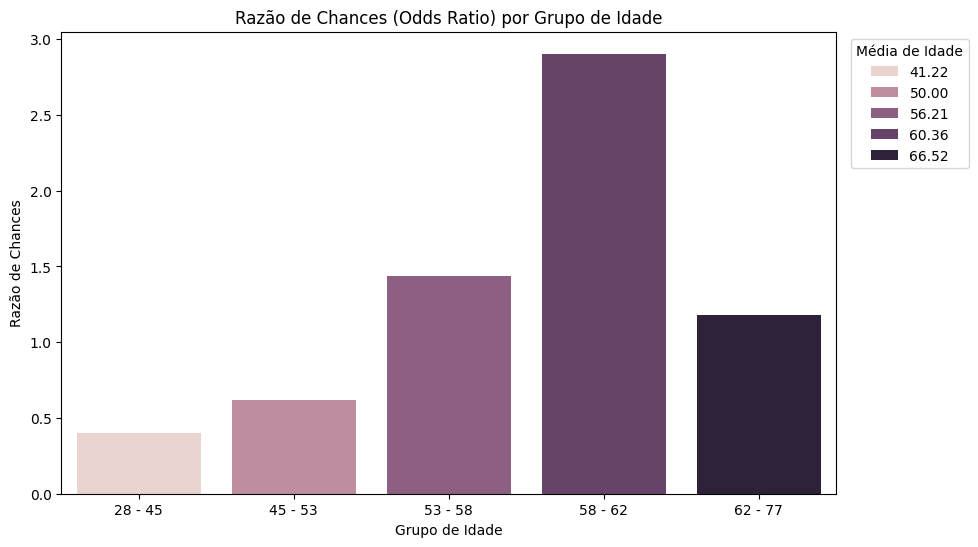

In [36]:
# Visualizando a razão de chances (odds_ratio) por grupo de idade
plt.figure(figsize=(10, 6))
sns.barplot(x=tab.grupo_idade[:-1],
            y=tab['odds_ratio'][:-1],
            hue=tab.mean_age[:-1],
            dodge=False)

handles, labels = plt.gca().get_legend_handles_labels()
formatted_labels = [f'{i:.2f}' for i in tab.mean_age[:-1]]

plt.title('Razão de Chances (Odds Ratio) por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Razão de Chances')
plt.legend(handles, formatted_labels, title='Média de Idade', loc='upper right', bbox_to_anchor=(1.18, 1))
plt.show()